In [62]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import pandas as pd
import numpy as np
import os
data_folder = os.path.join('../..', 'data')
file_name = "Data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
data = util.load_data(data_folder, file_name)
data = data[data['HomeTeam'].isna() == False]
home_factor, draw_factor, away_factor = data['FTR'].value_counts(normalize=True)['H'], data['FTR'].value_counts(normalize=True)['D'], data['FTR'].value_counts(normalize=True)['A']
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506


In [64]:
data['Home Prob'] = 0.34
data['Away Prob'] = 0.33
data['Draw Prob'] = 0.33
data = util.add_discrete_result_columns(data)
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,Season,Home Prob,Away Prob,Draw Prob,D,A,H
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,2.0,0.0,0.0,0506,0.34,0.33,0.33,True,False,False
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,1.0,0.0,0.0,0506,0.34,0.33,0.33,False,True,False
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,2.0,0.0,0.0,0506,0.34,0.33,0.33,True,False,False
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,0.0,0.0,0506,0.34,0.33,0.33,True,False,False
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,3.0,1.0,0.0,0506,0.34,0.33,0.33,True,False,False


In [72]:
cost_model = util.CostModel(wrong=1, chicken=0.75)
correct, wrong, missed = cost_model.stats(data, 0.2)
print(f"Correct: {correct}, Wrong: {wrong}, Missed: {missed}")

Correct: 11153, Wrong: 10266, Missed: 17001


In [73]:
ELO = util.ELO(data, init_rating=1500, draw_factor=draw_factor, k_factor=32, home_advantage=50)
data = ELO.perform_simulations(data)
data = ELO.get_probabilities(data)
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Draw Prob,D,A,H,Home ELO,Away ELO,ELO diff,Home_prob_ELO,Draw_prob_ELO,Away_prob_ELO
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,0.226716,True,False,False,1500,1500,0,0.458105,0.226716,0.315179
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,0.226716,False,True,False,1500,1500,0,0.458105,0.226716,0.315179
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,0.226716,True,False,False,1500,1500,0,0.458105,0.226716,0.315179
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,0.226716,True,False,False,1500,1500,0,0.458105,0.226716,0.315179
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,0.226716,True,False,False,1500,1500,0,0.458105,0.226716,0.315179


In [74]:
data['Home Prob'] = data['Home_prob_ELO']
data['Away Prob'] = data['Away_prob_ELO']
data['Draw Prob'] = data['Draw_prob_ELO']
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Draw Prob,D,A,H,Home ELO,Away ELO,ELO diff,Home_prob_ELO,Draw_prob_ELO,Away_prob_ELO
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,0.226716,True,False,False,1500,1500,0,0.458105,0.226716,0.315179
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,0.226716,False,True,False,1500,1500,0,0.458105,0.226716,0.315179
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,0.226716,True,False,False,1500,1500,0,0.458105,0.226716,0.315179
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,0.226716,True,False,False,1500,1500,0,0.458105,0.226716,0.315179
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,0.226716,True,False,False,1500,1500,0,0.458105,0.226716,0.315179


In [75]:
correct, wrong, missed = cost_model.stats(data, 0.33)
print(f"Correct: {correct}, Wrong: {wrong}, Missed: {missed}")
print(f"Cost: {cost_model.cost(data, 0)}")

Correct: 7087, Wrong: 5283, Missed: 26050
Cost: 20536.0


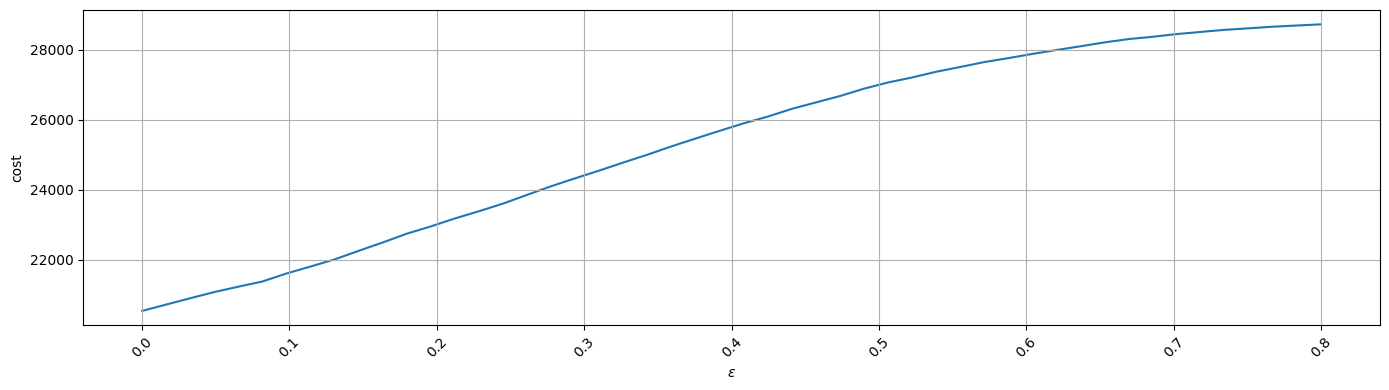

In [76]:
thr_range = np.linspace(0, 0.8, 50)
cost_range = pd.Series(index=thr_range, data=[cost_model.cost(data, thr) for thr in thr_range])
util.plot_series(cost_range, figsize=figsize, xlabel=r'$\varepsilon$', ylabel='cost')

In [59]:
best_thr, best_cost = util.opt_thr(data,  cost_model, thr_range)
print(f'Best threshold: {best_thr:.3f}, corresponding cost: {best_cost:.3f}')

Best threshold: 0.600, corresponding cost: 36935.000
